## Notebook for looking at epoch-by-epoch losses of models, saved during training

In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [12]:
""" Load in a list of trained models, as well as their last saved epoch. """
colors = ['red', 'deepskyblue', 'orange', 'violet']

save_dirs = [
    # "test_again",
    # "ftag_base_big",
    #"ftag_base_big_batch",
    #"ftag_three_layer_all_loss",
    #"test_three",
    #"ftag_ndive_big_batch",
    #"final_ftag_base",
    #"final_ftag_base",
    #"final_ftag_base",
    #"final_ftag_base",
    #"final_ftag_base",
    "final_ftag_base",
    #"final_ftag_ndive",
    #"final_ftag_ndive",
    #"final_ftag_ndive",
    #"final_ftag_ndive",
    #"final_ftag_ndive",
    "final_ftag_ndive",
    #"gn2_0709_batch100",
    #"gn2ndive_0809_batch100",
    #"gn2ndive_0809_batch100",
    #"gn2ndive_0809_batch100",
    #"gn2ndive_0809_batch100",
    #"gn2ndive_0809_batch100",
]

epoch_loss = [
    # 200,
    # 150,
    #200,
    #200,
    #None,
    #None,
    #None,
    #None,
    #None,
    #None,
    #None,
    #None,
    None,
    #None,
    #None,
    #None,
    #None,
    #None,
    None,
]

model_numbers = [
    #None,
    #None,
    #None,
    #0,
    #1,
    #2,
    #3,
    #4,
    5,
    0,
    #1,
    #2,
    #3,
    #4,
    5,
]

loss_names = ["loss_jet_flavor", "loss_track_origin", "loss_track_pairing",
              "loss_vertex_fit", "loss_chi2", "loss_track_weight"]


def plot_loss(ax, loss_idx, train_losses, test_losses):
    """ Plot a specific loss function for all loaded models. """
    for idx, config_name in enumerate(save_dirs):
        epochs = np.arange(1,len(train_losses[idx][loss_idx])+1)
        #ax.plot(epochs, train_losses[idx][loss_idx], linewidth=1.5, color=colors[idx], label=f"train {config_name}")
        ax.plot(epochs, train_losses[idx][loss_idx], linewidth=1.5, label=f"train {config_name}")
        
        #if test_losses is not None:
            #ax.plot(epochs, test_losses[idx][loss_idx], linewidth=1.5, 
            #        color=colors[idx], label=f"test {config_name}", ls='--', alpha=0.5)
            #ax.plot(epochs, test_losses[idx][loss_idx], linewidth=1.5, 
            #        label=f"test {config_name}", ls='--', alpha=0.5)

In [15]:
epochs = []
train_losses = []
test_losses = []

def full_save_path(save_dir, epoch=None, model_number=None):
    """ Get the path to a model by saved config name, epoch, and model number. """
    path = f"{os.getenv('NDIVE_MODEL_PATH')}{save_dir}"
    if model_number is not None:
        path += f"/model_{model_number}"
    if epoch is not None:
        path += f"/{epoch}"
    return path+"/losses.json"

for dir, epoch, model_num in zip(save_dirs, epoch_loss, model_numbers):
    data = []
    with open(full_save_path(dir,epoch, model_num), "r") as f:
        for line in f:
            data.append(json.loads(line))
            
    num_aux_losses = int((len(data)-2)/2)
    epoch, total_train_losses, total_test_losses, *individual_losses = data
    print(epoch)
    
    epochs.append(epoch)
    assert(len(individual_losses) == 2*num_aux_losses)
    train_aux_losses = individual_losses[0:num_aux_losses]
    test_aux_losses = individual_losses[num_aux_losses:]
    train_losses.append(train_aux_losses)
    test_losses.append(test_aux_losses)

241
137


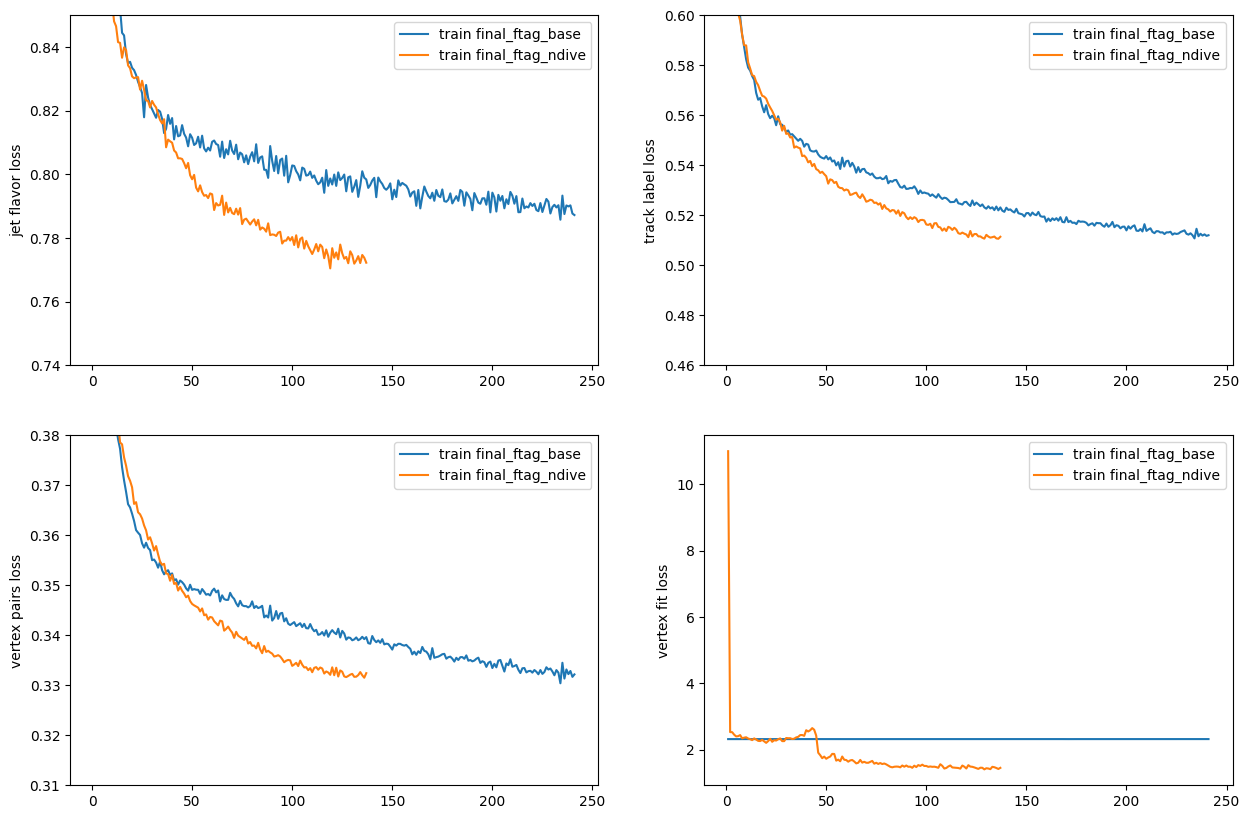

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

plot_loss(ax1, loss_names.index("loss_jet_flavor"), train_losses, test_losses)
ax1.set_ylabel("jet flavor loss")
ax1.set_ylim([.74, .85])
ax1.legend()

plot_loss(ax2, loss_names.index("loss_track_origin"), train_losses, test_losses)
ax2.set_ylabel("track label loss")
ax2.set_ylim([.46, .6])
ax2.legend()

plot_loss(ax3, loss_names.index("loss_track_pairing"), train_losses, test_losses) 
ax3.set_ylabel("vertex pairs loss")
ax3.set_ylim([.31, .38])
ax3.legend()

plot_loss(ax4, loss_names.index("loss_vertex_fit"), train_losses, test_losses)
ax4.set_ylabel("vertex fit loss")
# ax4.set_ylim([0.0,5.0])
ax4.legend()